In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
import sys
sys.path.append('/Users/francescomattioli/Library/CloudStorage/OneDrive-PolitecnicodiMilano/UNI/MAGISTRALE/SECONDO ANNO/PRIMO SEMESTRE/COMPLEX DATA IN HEALTH/PROJECT/Complex-data-health/scripts')
# Now you can import the script

import preprocessing


In [11]:
# Replace 'your_disease_gene_file.csv' with your actual file path
dga_file_path = 'data/disease_gene.tsv'
ppi_file_path = 'data/PPI.csv'

dga, ppi = preprocessing.preprocess_disease(ppi_file_path, dga_file_path)


In [12]:
# Filter the data to include only diseases with more than 10 associated genes
num_genes = dga.groupby('diseaseName').agg('count').sort_values(by='geneSymbol').reset_index().rename(columns={'geneSymbol':'count_genes'})
filtered_dga = dga.merge(num_genes, on='diseaseName', how='inner')
cleaned_dga = filtered_dga[filtered_dga['count_genes'] > 10][['geneSymbol', 'diseaseName']].drop_duplicates().reset_index(drop=True)

In [13]:
# Create a bipartite graph from the disease-gene associations
G = nx.Graph()
G.add_nodes_from(cleaned_dga['geneSymbol'], bipartite=0)
G.add_nodes_from(cleaned_dga['diseaseName'], bipartite=1)
G.add_edges_from([(row['geneSymbol'], row['diseaseName']) for idx, row in cleaned_dga.iterrows()])

In [14]:
# Project the bipartite graph to create a disease network
g_projected = nx.algorithms.bipartite.projected_graph(G, nodes=cleaned_dga['diseaseName'])

In [15]:
# Replace 'dementia' with the exact string used in your dataset if necessary
disease = 'dementia'
# Check the degree of 'dementia' in the projected network
disease_degree = g_projected.degree[disease]
print(f"The degree of dementia in the network is: {disease_degree}")

# Identify diseases connected to dementia
connected_diseases = list(g_projected.neighbors(disease))
print(f"Diseases connected to dementia: {connected_diseases[:5]}")  # Print a few examples


The degree of dementia in the network is: 182
Diseases connected to dementia: ['schizophrenia', "alzheimer's disease", 'malignant tumor of colon', 'presenile dementia', 'mental depression']


In [16]:
# Compute the average shortest path length from dementia to other diseases
path_lengths = nx.single_source_shortest_path_length(g_projected, disease)
average_path_length = sum(path_lengths.values()) / len(path_lengths)
print(f"The average shortest path length of dementia to other diseases is: {average_path_length}")

The average shortest path length of dementia to other diseases is: 1.8063112078346029


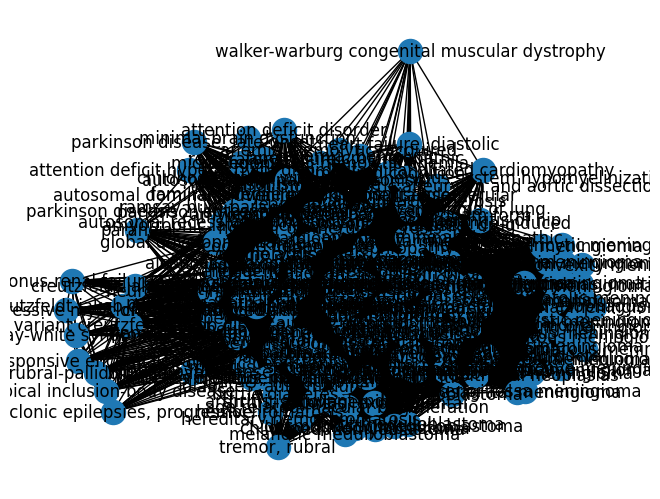

In [17]:
# Extract the subgraph for dementia and its connected diseases
subgraph = g_projected.subgraph([disease] + connected_diseases)
# Plot the subgraph
nx.draw(subgraph, with_labels=True)
plt.show()
